In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
en_data = data[data['Language']=='en']
en_data

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|\n@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') # removing any symbol that is NOT number, letter, space, '#', '+', or '_'.
STOPWORDS = set(stopwords.words('english')) # only dealing with English Lyrics, so set stopwords to 'english'

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub(' ', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with space. 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

en_data['Lyrics'] = en_data['Lyrics'].apply(clean_text)
en_data['Lyrics'] = en_data['Lyrics'].str.replace('\d+', '') # replacing one or more digits by nothing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
test['Lyrics'] = test['Lyrics'].apply(clean_text)
test['Lyrics'] = test['Lyrics'].str.replace('\d+', '') # replacing one or more digits by nothing

In [ ]:
en_data.head(20)

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,starts pain followed hate fueled endless quest...
1,12 stones,broken,Rock,en,freedom alone alone patiently waiting phone ho...
2,12 stones,3 leaf loser,Rock,en,biting hand feeds lying voice inside reach beg...
3,12 stones,anthem for the underdog,Rock,en,say know imagine waits across line thought sti...
4,12 stones,adrenaline,Rock,en,heart beating faster control feelings anymore ...
5,12 stones,anthem for the underdog (picture perfect sessi...,Rock,en,say know imagine waits across line thought sti...
6,12 stones,picture perfect,Rock,en,looking light darkness something fools searchi...
7,12 stones,bitter,Rock,en,mother mother hear keep trying find know show ...
8,12 stones,it was you,Rock,en,showed taught stand know real sick pain tired ...
9,12 stones,back up,Rock,en,hear words say see way look know mind stand ge...


In [ ]:
en_data['length'] = en_data['Lyrics'].str.len()
en_data['Lyrics'].replace('',np.nan,inplace=True)
en_data.dropna(subset=['Lyrics'],inplace=True)
en_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250195 entries, 0 to 290182
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    250195 non-null  object
 1   Song      250194 non-null  object
 2   Genre     250195 non-null  object
 3   Language  250195 non-null  object
 4   Lyrics    250195 non-null  object
 5   length    250195 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.4+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
en_data

,Artist,Song,Genre,Language,Lyrics,length
0,12 stones,world so cold,Rock,en,starts pain followed hate fueled endless quest...,901
1,12 stones,broken,Rock,en,freedom alone alone patiently waiting phone ho...,762
2,12 stones,3 leaf loser,Rock,en,biting hand feeds lying voice inside reach beg...,419
3,12 stones,anthem for the underdog,Rock,en,say know imagine waits across line thought sti...,352
4,12 stones,adrenaline,Rock,en,heart beating faster control feelings anymore ...,970
...,...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,best friend got give shirt back knows trust li...,734
290179,bad boys blue,i totally miss you,Pop,en,bad boys blue totally miss wrong foolish heart...,748
290180,celine dion,sorry for love,Pop,en,forgive things never said forgive knowing righ...,695
290181,dan bern,cure for aids,Indie,en,day found cure aids day found cure aids everyb...,649


In [ ]:
test

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,folks spend days daydreaming finding clues who...,8294
1,come-on-out,2012,the-elwins,Indie,take cold hands put face sharpen axe criminal ...,21621
2,riot,2013,bullet-for-my-valentine,Metal,ready time war break fucking doors smash windo...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,ask change color hair yeah ask need thirty two...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,believe magic young girl heart music free when...,16797
...,...,...,...,...,...,...
7930,too-little-too-late,2006,amanda-marshall,Rock,tuesday night hear voice telephone doin fine...,23453
7931,berserker,2007,aurora-borealis,Metal,elite forces cloaked fur un sensitive pain bur...,2724
7932,natural-born-killaz,2010,dr-dre,Hip-Hop,dr dre journey mind maniac doomed killer since...,24147
7933,wide-awake,2011,chris-cornell,Rock,look hurricane right eye people dead left die...,4150


In [ ]:
lyrics = en_data['Lyrics'].values
genre = en_data['Genre'].values

from sklearn.model_selection import train_test_split

lyrics_train, lyrics_val, genre_train, genre_val = train_test_split(lyrics, genre, test_size=0.2, random_state=100)

In [ ]:
lyrics_test = test['Lyrics'].values
genre_test = test['Genre'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(genre_train)
y_train = encoder.transform(genre_train)
y_val = encoder.transform(genre_val)

In [ ]:
y_test = encoder.transform(genre_test)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[    0  1521]
 [    1  1615]
 [    2  6525]
 [    3  1819]
 [    4  5781]
 [    5 10702]
 [    6 15256]
 [    7 68956]
 [    8  2207]
 [    9 85774]]


In [ ]:
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[    0   369]
 [    1   390]
 [    2  1644]
 [    3   419]
 [    4  1459]
 [    5  2612]
 [    6  3877]
 [    7 17341]
 [    8   557]
 [    9 21371]]


In [ ]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0  810]
 [   1  660]
 [   2  495]
 [   3  960]
 [   4  510]
 [   5  660]
 [   6  810]
 [   7 1110]
 [   8  510]
 [   9 1410]]


In [ ]:
from keras.utils import np_utils

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_val = np_utils.to_categorical(y_val)
dummy_y_test = np_utils.to_categorical(y_test)

dummy_y_train.shape, dummy_y_val.shape, dummy_y_test.shape

((200156, 10), (50039, 10), (7935, 10))

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=5000)   # num_words is the size of the vocabulary (top 5000 frequent words in the vocabulary)
tokenizer.fit_on_texts(lyrics_train)    # Updates internal vocabulary based on a list of texts

X_train = tokenizer.texts_to_sequences(lyrics_train)  # Transforms each text in texts to a sequence of integers with its corresponding integer value from the word_index dictionary
X_val = tokenizer.texts_to_sequences(lyrics_val)
X_test = tokenizer.texts_to_sequences(lyrics_test)

# The number of unique words in the whole training text
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for padding


In [ ]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
  
    return maxList, maxLength

print(FindMaxLength(X_train))

([4999, 1101, 455, 455, 6, 362, 930, 5, 5, 42, 1604, 516, 8, 46, 7, 12, 42, 1131, 72, 1188, 175, 227, 529, 198, 263, 27, 1130, 2976, 2976, 66, 425, 2562, 2562, 12, 89, 1059, 62, 484, 98, 87, 583, 642, 7, 852, 30, 27, 22, 8, 42, 2312, 10, 295, 474, 294, 278, 5, 19, 211, 1101, 1101, 1101, 1101, 1101, 22, 8, 42, 2312, 10, 295, 474, 294, 278, 5, 19, 211, 2976, 2976, 66, 425, 2562, 2562, 12, 89, 1059, 62, 484, 34], 1473)


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train.shape, X_val.shape, X_test.shape

((200156, 500), (50039, 500), (7935, 500))

## Simple RNN Model

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN

embedding_dim = 50
vocab_size = 5000

model01 = Sequential()
model01.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model01.add(SimpleRNN(embedding_dim))
model01.add(Dense(200, activation='relu'))
model01.add(Dense(10, activation='softmax'))
model01.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           250000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 200)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 267,260
Trainable params: 267,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist01 = model01.fit(X_train, dummy_y_train,
          batch_size=128,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/5
1564/1564 [==============================] - 916s 584ms/step - loss: 1.4865 - accuracy: 0.4266 - val_loss: 1.4668 - val_accuracy: 0.4275
Epoch 2/5
1564/1564 [==============================] - 908s 581ms/step - loss: 1.4688 - accuracy: 0.4273 - val_loss: 1.4687 - val_accuracy: 0.4271
Epoch 3/5
1564/1564 [==============================] - 909s 582ms/step - loss: 1.4709 - accuracy: 0.4284 - val_loss: 1.4642 - val_accuracy: 0.4277
Epoch 4/5
1564/1564 [==============================] - 912s 583ms/step - loss: 1.4657 - accuracy: 0.4282 - val_loss: 1.4654 - val_accuracy: 0.4273
Epoch 5/5
1564/1564 [==============================] - 917s 586ms/step - loss: 1.4648 - accuracy: 0.4279 - val_loss: 1.4625 - val_accuracy: 0.4277


### Save Model and predict on test data

In [ ]:
!pip install -q pyyaml h5py


# save it as a h5 file


from tensorflow.keras.models import load_model

model01.save('rnn_01.h5')

In [ ]:
saved_LSTM = keras.models.load_model('lstm_epoch10.h5')

loss, accuracy = saved_LSTM.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
prediction = saved_LSTM.predict(X_test)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(7935):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

### Model Evaluation on validation data

In [ ]:
prediction = model01.predict(X_val)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(50039):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[0.00792704 0.00788457 0.03201718 ... 0.3504616  0.01041298 0.42375183]
 [0.00792704 0.00788457 0.03201718 ... 0.35046163 0.01041298 0.42375183]
 [0.00792704 0.00788457 0.03201718 ... 0.3504616  0.01041298 0.42375183]
 ...
 [0.00792704 0.00788457 0.03201718 ... 0.3504616  0.01041298 0.42375183]
 [0.00792704 0.00788457 0.03201718 ... 0.3504616  0.01041298 0.42375183]
 [0.00792704 0.00788457 0.03201718 ... 0.35046163 0.01041298 0.42375183]]
['Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Ro

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Pop' '38']
 ['Rock' '50001']]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Training Accuracy: 0.4294
Testing Accuracy:  0.4277


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde5eb9fe10>,
       dtype=object))

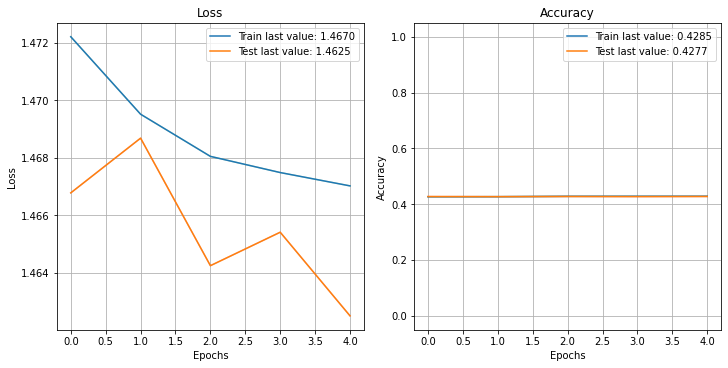

In [ ]:
!pip install plot_keras_history
from plot_keras_history import plot_history

loss, accuracy = model01.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model01.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist01)